# Traitement, Visualisation et Analyse des données

## 1.Déploiement de l’environnement

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
mp.__version__

'3.2.2'

## 2.Sources de données : Manipulation

In [2]:
index = ['1', '3', '4', '6', '7', '8']
columns=['taux_de_ventes', 'croissance_vente', 'ratio_benefice', 'ratio_perte']

bdd = pd.DataFrame(np.random.rand(6,4), index = index, columns = columns)
bdd

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
1,0.246930,0.539137,0.779346,0.837979
3,0.312596,0.061272,0.149226,0.557323
4,0.946610,0.494933,0.669816,0.810180
6,0.275763,0.777137,0.633000,0.167078
7,0.020835,0.616486,0.853606,0.534765
8,0.215970,0.986758,0.597915,0.634693


In [3]:
new_index = ['1', '2', '3', '4', '5', '6', '7', '8']

bdd = bdd.reindex(new_index)
bdd

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
1,0.246930,0.539137,0.779346,0.837979
2,NaN,NaN,NaN,NaN
3,0.312596,0.061272,0.149226,0.557323
4,0.946610,0.494933,0.669816,0.810180
5,NaN,NaN,NaN,NaN
6,0.275763,0.777137,0.633000,0.167078
7,0.020835,0.616486,0.853606,0.534765
8,0.215970,0.986758,0.597915,0.634693


In [4]:
bd = bdd.fillna(0)
bd

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
1,0.246930,0.539137,0.779346,0.837979
2,0.000000,0.000000,0.000000,0.000000
3,0.312596,0.061272,0.149226,0.557323
4,0.946610,0.494933,0.669816,0.810180
5,0.000000,0.000000,0.000000,0.000000
6,0.275763,0.777137,0.633000,0.167078
7,0.020835,0.616486,0.853606,0.534765
8,0.215970,0.986758,0.597915,0.634693


In [5]:
bdd = bdd.dropna()
bdd

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
1,0.246930,0.539137,0.779346,0.837979
3,0.312596,0.061272,0.149226,0.557323
4,0.946610,0.494933,0.669816,0.810180
6,0.275763,0.777137,0.633000,0.167078
7,0.020835,0.616486,0.853606,0.534765
8,0.215970,0.986758,0.597915,0.634693


In [6]:
bdd.isna()

,taux_de_ventes,croissance_vente,ratio_benefice,ratio_perte
1,False,False,False,False
3,False,False,False,False
4,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False


## 3.Traitement des données

In [7]:
df = pd.read_csv('credit_immo.csv')
df

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45,CDI,40000,4000,M,0.3,3.0,OUI
1,VANESSA,5.0,28,CDI,30500,1320,M,0.1,0.0,OUI
2,TARCISSE,0.0,55,CDI,28000,40000,C,0.0,0.0,NON
3,TIBAULT,4.0,23,CDD,15000,0,M,0.1,NaN,OUI
4,GILES,0.0,33,CDD,27000,3000,C,0.1,2.0,NON
5,ETHAN,0.0,41,INTERIM,40000,1000,M,0.0,4.0,NON
6,LILIANE,-1.0,29,CDI,50000,3000,C,0.0,0.0,NON
7,GLODI,-3.0,24,INTERIM,29000,5000,C,0.0,0.0,NON
8,FLORIANE,NaN,26,CDI,44000,0,M,0.1,1.0,OUI
9,MARIE,3.0,37,CDI,45800,2000,M,0.2,2.0,OUI


In [8]:
df.mean()

Niv_Etude_Bac           1.444444
age                    36.947368
Salaire             43331.578947
dette_anterieure    11890.526316
apport                  0.142105
enfant_a_Charge         1.333333
dtype: float64

In [9]:
df.isna()

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [10]:
#Les entrées ne prennent pas en compte la solvabilité et les noms
X=df.iloc[:,-9:-1].values
#La sortie correspond à la solvabilité des clients
Y=df.iloc[:,-1].values




array(['OUI', 'OUI', 'NON', 'OUI', 'NON', 'NON', 'NON', 'NON', 'OUI',
       'OUI', 'OUI', 'NON', 'NON', 'NON', 'NON', 'NON', 'OUI', 'OUI',
       'OUI'], dtype=object)

### Encoder les valeurs catégoriques (LabelEncoder).

In [11]:
encoder = LabelEncoder()
for col in ['contrat_de_travail','etat_civile','Solvable']:
    df[col]=encoder.fit_transform(df[col])

### Transformer les valeurs manquantes en moyenne (SimpleImputer).

In [12]:
imptr=SimpleImputer(missing_values=np.NaN, strategy='mean')

for col in  df.drop("ID_NOM",axis=1).columns:
    imptr.fit(df[col].values.reshape(-1,1))
    df[col]=imptr.transform(df[col].values.reshape(-1,1))[0:,0]


### Fractionner le jeu de données pour l’entrainement et le test (Training and Test set).

In [14]:
train_set = df.sample(frac=0.8, random_state=0)
train_set


,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
10,BAKAMBU,2.000000,40.0,1.0,60000.0,1500.0,1.0,0.3,3.0,1.0
1,VANESSA,5.000000,28.0,1.0,30500.0,1320.0,1.0,0.1,0.0,1.0
8,FLORIANE,1.444444,26.0,1.0,44000.0,0.0,1.0,0.1,1.0,1.0
18,HOLLANDE,4.000000,32.0,1.0,21000.0,1200.0,1.0,0.1,2.0,1.0
14,JOSEPH,1.000000,70.0,0.0,45000.0,17000.0,0.0,0.3,0.0,0.0
16,FENG,8.000000,46.0,1.0,80000.0,8000.0,1.0,0.0,3.0,1.0
6,LILIANE,-1.000000,29.0,1.0,50000.0,3000.0,0.0,0.0,0.0,0.0
4,GILES,0.000000,33.0,0.0,27000.0,3000.0,0.0,0.1,2.0,0.0
2,TARCISSE,0.000000,55.0,1.0,28000.0,40000.0,0.0,0.0,0.0,0.0
5,ETHAN,0.000000,41.0,3.0,40000.0,1000.0,1.0,0.0,4.0,0.0


In [15]:
test_set = df.drop(train_set.index)
test_set

,ID_NOM,Niv_Etude_Bac,age,contrat_de_travail,Salaire,dette_anterieure,etat_civile,apport,enfant_a_Charge,Solvable
0,jean,3.0,45.0,1.0,40000.0,4000.0,1.0,0.3,3.000000,1.0
3,TIBAULT,4.0,23.0,0.0,15000.0,0.0,1.0,0.1,1.333333,1.0
12,WUAN,-3.0,39.0,3.0,29000.0,4900.0,1.0,0.0,1.000000,0.0
15,DIANE,0.0,42.0,2.0,70000.0,26000.0,1.0,0.2,0.000000,0.0


In [16]:
print(X.shape)
print(Y.shape)

(19, 8)
(19,)


In [17]:
Y=df.iloc[:,-1].values.reshape(-1,1)

### mise à l’échelle des features (StandardScaler).

In [19]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

scaler = StandardScaler()
#print(X_test)
#col_label = ['Niv_Etude_Bac','age','contrat_de_travail','Salaire','dette_anterieure','etat_civile','apport','enfant_a_Charge','Solvable']
X_test = scaler.fit_transform(df.drop("ID_NOM",axis=1))
#X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test).round(10)
X_test

,0,1,2,3,4,5,6,7,8
0,0.584778,0.699645,-0.169300,-0.159400,-0.342231,0.679366,1.243540,1.326371,1.054093
1,1.336635,-0.777383,-0.169300,-0.613929,-0.458469,0.679366,-0.331611,-1.061097,1.054093
2,-0.543008,1.568485,-0.169300,-0.733541,1.219175,-1.471960,-1.119186,-1.061097,-0.948683
3,0.960706,-1.211803,-1.241532,-1.355528,-0.515720,0.679366,-0.331611,0.000000,1.054093
4,-0.543008,-0.342963,-1.241532,-0.781386,-0.385603,-1.471960,-0.331611,0.530548,-0.948683
5,-0.543008,0.352109,1.975164,-0.159400,-0.472348,0.679366,-1.119186,2.122193,-0.948683
6,-0.918937,-0.690499,-0.169300,0.319051,-0.385603,-1.471960,-1.119186,-1.061097,-0.948683
7,-1.670794,-1.124919,1.975164,-0.685696,-0.298859,-1.471960,-1.119186,-1.061097,-0.948683
8,0.000000,-0.951151,-0.169300,0.031981,-0.515720,0.679366,-0.331611,-0.265274,1.054093
9,0.584778,0.004573,-0.169300,0.118102,-0.428976,0.679366,0.455965,0.530548,1.054093


## 4.Visualisation de données

In [20]:
mt = pd.read_csv('Montant_Temps.csv')
mt

,Montant_du_capitale,Temps
0,1,5
1,12,6
2,13,7
3,2,8
4,3,9
5,0,10
6,1,11
7,6,12
8,7,13
9,4,14


### 4.1 Rajoutez du style à vos graphiques

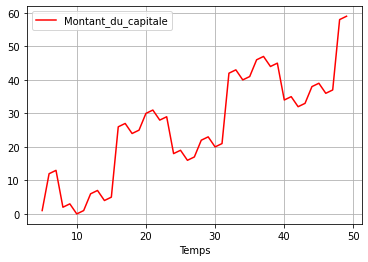

In [23]:
mt.plot('Temps','Montant_du_capitale', c='red')
plt.grid(True)

### 4.2 Visualisation de données sous forme de nuage de points

In [21]:
x = ['Temps']
y = ['Montant_du_capitale']

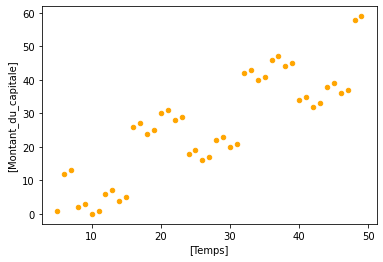

In [22]:
mt.plot.scatter(x,y, c='orange')

## 5.Analyse de données

In [2]:
data = pd.read_csv('tendance_centrale.csv')
data

,Nom,Age,Rating
0,ANATOLE,55,4.53
1,Vincent,59,3.54
2,Brenda,55,3.98
3,Philippe,53,5.59
4,Michel,30,3.50
5,Tillier,59,4.90
6,Blanchard,53,3.80
7,perez,34,3.78
8,théo,40,5.98
9,cyprien,30,4.80


### 5.1 Mesure de tendance centrale

In [10]:
print(data['Age'].mean())
print("=====================================")
print(data['Age'].median())
print("=====================================")
print(data['Age'].mode())

45.64705882352941
49.0
0    53
dtype: int64


In [11]:
print(data['Rating'].mean())
print("==================================")
print(data['Rating'].median())
print("==================================")
print(data['Rating'].mode())

4.438823529411764
4.3
0    3.78
1    3.95
2    4.30
3    4.80
4    5.98
dtype: float64


In [26]:
print(data.mean())
print("=====================================")
print(data.median())
print("=====================================")
print(data.mode())

Age       45.647059
Rating     4.438824
dtype: float64
Age       49.0
Rating     4.3
dtype: float64
     Nom   Age  Rating
0  perez  53.0    3.78
1    NaN   NaN    3.95
2    NaN   NaN    4.30
3    NaN   NaN    4.80
4    NaN   NaN    5.98


### 5.2 Analyse de la variance

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [33]:
data_lm = ols('Rating ~ Age', data=data).fit()
print(sm.stats.anova_lm(data_lm, type=2))
# on regarde PR

            df     sum_sq   mean_sq         F    PR(>F)
Age        1.0   0.049125  0.049125  0.072237  0.791769
Residual  15.0  10.200851  0.680057       NaN       NaN


### 5.3 Analyse de corrélation

In [29]:
iris = pd.read_csv('iris.csv')
iris

,longueur_sepal,largeur_sepal,longueur_petal,largeur_petal,espèce
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [30]:
iris.corr()

,longueur_sepal,largeur_sepal,longueur_petal,largeur_petal
longueur_sepal,1.000000,-0.117570,0.871754,0.817941
largeur_sepal,-0.117570,1.000000,-0.428440,-0.366126
longueur_petal,0.871754,-0.428440,1.000000,0.962865
largeur_petal,0.817941,-0.366126,0.962865,1.000000


#### 5.3.1 Analyse graphique

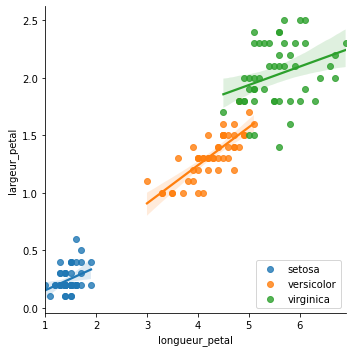

In [31]:
sns.lmplot( x="longueur_petal", y="largeur_petal", data=iris, fit_reg=True, hue='espèce', legend=False)
plt.legend(loc='lower right')
plt.show()

#### 5.3.2 Analyse mathématiques

In [32]:
pear = iris.corr(method='pearson')
pear

,longueur_sepal,largeur_sepal,longueur_petal,largeur_petal
longueur_sepal,1.000000,-0.117570,0.871754,0.817941
largeur_sepal,-0.117570,1.000000,-0.428440,-0.366126
longueur_petal,0.871754,-0.428440,1.000000,0.962865
largeur_petal,0.817941,-0.366126,0.962865,1.000000
